In [1]:
import pandas as pd
import numpy as np


raw=pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit2/data/housing.csv")

In [3]:
raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#target_variable = price
#guess would be your prediction
#guess is derived from learned relationships between all relationships

#CRIM = crime rate

In [ ]:
#linear regression
# easy but: 1) not sensititive to outliers and because linear 2) not the best predictor

#most techniques, need to transform the data and with linear, really have to update
#some distribution requirements needed


In [ ]:
#ensembles are a good way to compare/contrast

In [4]:
from sklearn.linear_model import LinearRegression

In [14]:
#need to initialize LinReg
#object oriented nature of scikit learn 
lreg = LinearRegression()

In [12]:
#create new variables

X = raw[['LSTAT']]
y = raw['PRICE']

In [9]:
X.shape

(506, 1)

In [10]:
X_test = raw['LSTAT']

In [11]:
X_test.shape

(506,)

In [16]:
#notice how there's no '1' in the columns 
# a series as a default does not have a second dimension to it

lreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#hyper parameter tuning - you are updating the built-in options (e.g. fit-intercept, etc)

In [18]:
lreg.coef_

array([-0.95004935])

In [19]:
lreg.intercept_

34.55384087938311

In [20]:
X[:1]

,LSTAT
0,4.98


In [23]:
X[:1]*lreg.coef_[0]

,LSTAT
0,-4.731246


In [25]:
X[:1]*lreg.coef_[0]+lreg.intercept_

,LSTAT
0,29.822595


In [ ]:
#the first thing you have to do is fit()

In [26]:
lreg.predict(X[:1])

array([29.8225951])

In [27]:
X_v2 = raw[['LSTAT', 'RM']]
y_v2 = raw['PRICE']

In [29]:
lreg.fit(X_v2,y_v2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lreg.coef_

array([-0.64235833,  5.09478798])

In [31]:
lreg.intercept_

-1.3582728118744605

In [33]:
X_v2[:1]

,LSTAT,RM
0,4.98,6.575


In [37]:
X_v2[:1]*lreg.coef_[0]

,LSTAT,RM
0,-3.198945,-4.223506


In [50]:
X_v2[:1]*lreg.coef_ + lreg.intercept_

,LSTAT,RM
0,-4.557217,32.139958


In [51]:
#covariance matrix 

In [58]:
(X_v2[:1]*lreg.coef_).sum(axis=1) + lreg.intercept_

0    28.941014
dtype: float64

In [57]:
lreg.score(X_v2,y_v2)

0.6385616062603403

In [ ]:
#r squared is the explanatory value of our model
# percentage of change in y that can be explained by our model

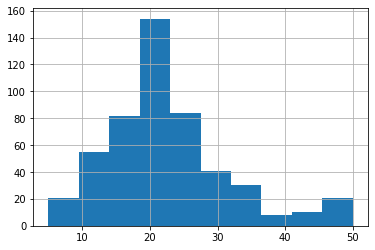

In [69]:
%matplotlib inline
y_v2.hist()

In [71]:
raw['PREDICTION'] = lreg.predict(X_v2)

In [72]:
#square so to remove negatives
(y_v2 - y_v2.mean())**2

0        2.152657
1        0.870128
2      148.040602
3      118.095898
4      186.792183
5       38.034278
6        0.134831
7       20.859258
8       36.394752
9       13.197282
10      56.743171
11      13.197282
12       0.693566
13       4.548863
14      18.773211
15       6.931669
16       0.321709
17      25.329139
18       5.441985
19      18.773211
20      79.795029
21       8.601353
22      53.770049
23      64.525977
24      48.063804
25      74.525345
26      35.198191
27      59.796294
28      17.080088
29       2.349495
          ...    
476     34.021630
477    110.940009
478     62.929416
479      1.283250
480      0.218270
481      1.362341
482      6.087045
483      0.537005
484      3.735740
485      1.776373
486     11.784159
487      3.735740
488     53.770049
489    241.268072
490    208.305898
491     79.795029
492      5.918547
493      0.537005
494      3.869851
495      0.321709
496      8.024792
497     17.916649
498      1.776373
499     25.329139
500     32

In [73]:
naive_model_cost = np.sum((y_v2 - y_v2.mean())**2)

In [74]:
naive_model_cost

42716.29541501976

In [76]:
y_v2-raw['PREDICTION']

0      -4.941014
1      -3.884206
2       2.040925
3       0.993480
4       4.569593
5       0.645473
6       1.612922
7       9.314403
8       8.395307
9       0.653493
10     -2.994962
11     -1.832213
12      3.146516
13     -3.244741
14     -4.908958
15     -3.023945
16     -1.552576
17     -2.236110
18      1.270278
19     -2.373776
20      0.082676
21     -0.548322
22     -2.708967
23     -0.987646
24     -2.752810
25     -2.662109
26     -2.144403
27     -3.549958
28     -5.110188
29     -3.948889
         ...    
476    -2.977079
477     2.336663
478    -3.971270
479    -0.555844
480    -0.544465
481    -4.359693
482    -5.113093
483     0.495478
484     0.615833
485    -2.803878
486    -1.068733
487    -0.771447
488     0.372291
489    -3.827580
490     2.575713
491    -3.916429
492    -0.448360
493     1.797041
494     4.396209
495     6.876332
496     7.176821
497    -0.803676
498     0.192014
499     0.185009
500    -3.343019
501    -3.620059
502    -3.389216
503    -6.6600

In [78]:
#or can use the below
raw['PRICE']-raw['PREDICTION']

0      -4.941014
1      -3.884206
2       2.040925
3       0.993480
4       4.569593
5       0.645473
6       1.612922
7       9.314403
8       8.395307
9       0.653493
10     -2.994962
11     -1.832213
12      3.146516
13     -3.244741
14     -4.908958
15     -3.023945
16     -1.552576
17     -2.236110
18      1.270278
19     -2.373776
20      0.082676
21     -0.548322
22     -2.708967
23     -0.987646
24     -2.752810
25     -2.662109
26     -2.144403
27     -3.549958
28     -5.110188
29     -3.948889
         ...    
476    -2.977079
477     2.336663
478    -3.971270
479    -0.555844
480    -0.544465
481    -4.359693
482    -5.113093
483     0.495478
484     0.615833
485    -2.803878
486    -1.068733
487    -0.771447
488     0.372291
489    -3.827580
490     2.575713
491    -3.916429
492    -0.448360
493     1.797041
494     4.396209
495     6.876332
496     7.176821
497    -0.803676
498     0.192014
499     0.185009
500    -3.343019
501    -3.620059
502    -3.389216
503    -6.6600

In [80]:
our_model_cost = np.sum((raw['PRICE']-raw['PREDICTION'])**2)

In [82]:
our_model_cost,naive_model_cost

(15439.309201313532, 42716.29541501976)

In [83]:
our_model_cost/naive_model_cost

0.3614383937396597

In [85]:
lreg.score(X_v2, y_v2)

0.6385616062603403

In [86]:
1-lreg.score(X_v2, y_v2)

0.3614383937396597

In [ ]:
#same as the score method
#basically how accurate between most naive estimate and your model 

In [ ]:
#if r squared is 1 then the model fits perfectly
#with the naive model just looking at one column
#informational gain that model has beyound looking at the target variable itself
#hypothethically it can be less than zero, so less informative than the target varibale itself
